## Building model
### Libraries

In [42]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
#import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


### Loading datasets

In [43]:
actions = np.array(['adios', 'amor', 'animal',
                    'bienvenida', 'gracias', 'hola', 
                    'hombre', 'internet', 'mujer',
                    'nino_na', 'objeto', 'persona',
                    'radio', 'television', 'tristeza'])

In [44]:
data_folder='dataset'

X_train=np.load(os.path.join(data_folder, 'X_train.npy'))
X_test=np.load(os.path.join(data_folder, 'X_test.npy'))
y_train=np.load(os.path.join(data_folder, 'y_train.npy'))
y_test=np.load(os.path.join(data_folder, 'y_test.npy'))

### Build and Train LSTM Neural Network

In [45]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [46]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 59707

In [48]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [49]:
# Train the model
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
14/14 [==============================] - 6s 82ms/step - loss: 2.7948 - categorical_accuracy: 0.0703
Epoch 2/2000
14/14 [==============================] - 1s 79ms/step - loss: 2.6054 - categorical_accuracy: 0.1405
Epoch 3/2000
14/14 [==============================] - 1s 79ms/step - loss: 2.4714 - categorical_accuracy: 0.1780
Epoch 4/2000
14/14 [==============================] - 1s 78ms/step - loss: 2.4239 - categorical_accuracy: 0.1710
Epoch 5/2000
14/14 [==============================] - 1s 79ms/step - loss: 2.4228 - categorical_accuracy: 0.1546
Epoch 6/2000
14/14 [==============================] - 1s 79ms/step - loss: 2.2570 - categorical_accuracy: 0.2529
Epoch 7/2000
14/14 [==============================] - 1s 80ms/step - loss: 1.9423 - categorical_accuracy: 0.3208
Epoch 8/2000
14/14 [==============================] - 1s 81ms/step - loss: 1.6655 - categorical_accuracy: 0.4098
Epoch 9/2000
14/14 [==============================] - 1s 81ms/step - loss: 1.4663 - categorical_

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

Reusing TensorBoard on port 6006 (pid 21412), started 8:04:15 ago. (Use '!kill 21412' to kill it.)

## Make Predictions

In [50]:
res=model.predict(X_test)

1/1 [==============================] - 1s 546ms/step


In [51]:
actions[np.argmax(res[0])]

'persona'

In [52]:
actions[np.argmax(y_test[0])]

'persona'

## Save Weights
### Saving model

In [53]:
# Check if the directory 'models' already exists
if not os.path.exists("models"):
    os.makedirs("models")

In [54]:
# Saving the model
model.save("models/sl_model_ver1.h5")

### Loading model

In [15]:
# Path to the model file
model_path="models/sl_model_ver1.h5"

In [16]:
# Load the model
model=load_model(model_path)

In [17]:
# Check the structure model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 597071 

In [18]:
model.load_weights(model_path)

### Evaluation using Confusion Matrix and Accuracy

In [55]:
ypred=model.predict(X_test)

1/1 [==============================] - 0s 70ms/step


In [56]:
ytrue=np.argmax(y_test, axis=1)
ypred=np.argmax(ypred, axis=1)

In [57]:
# Calcular la matriz de confusión multilabel
confusion_matrix=multilabel_confusion_matrix(ytrue, ypred)
confusion_matrix

array([[[20,  1],
        [ 0,  2]],

       [[18,  0],
        [ 0,  5]],

       [[22,  0],
        [ 0,  1]],

       [[21,  0],
        [ 1,  1]],

       [[21,  0],
        [ 0,  2]],

       [[21,  0],
        [ 2,  0]],

       [[21,  0],
        [ 0,  2]],

       [[21,  2],
        [ 0,  0]],

       [[21,  0],
        [ 0,  2]],

       [[18,  2],
        [ 0,  3]],

       [[21,  0],
        [ 2,  0]]], dtype=int64)

In [58]:
len(confusion_matrix)

11

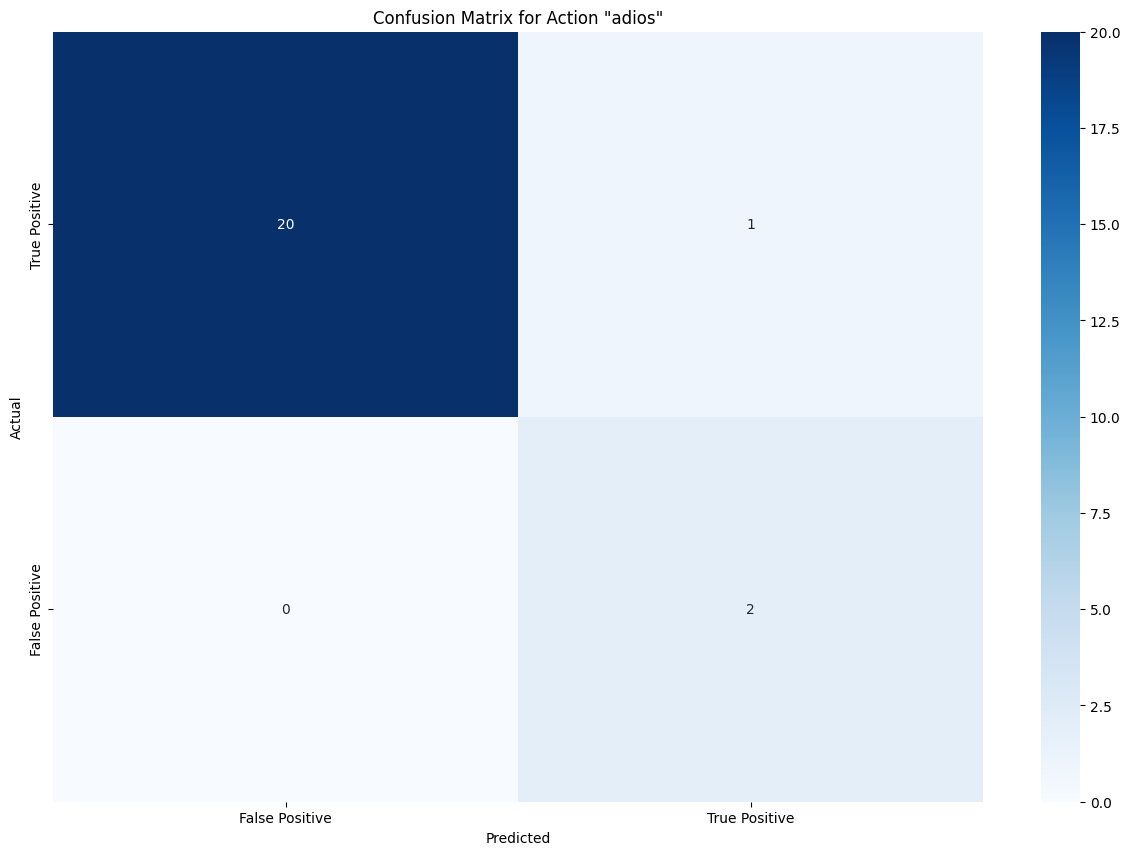

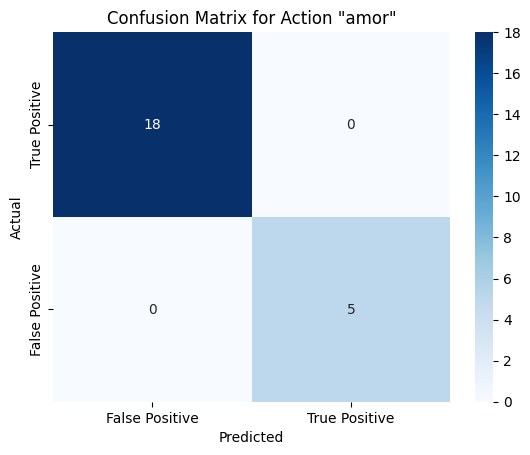

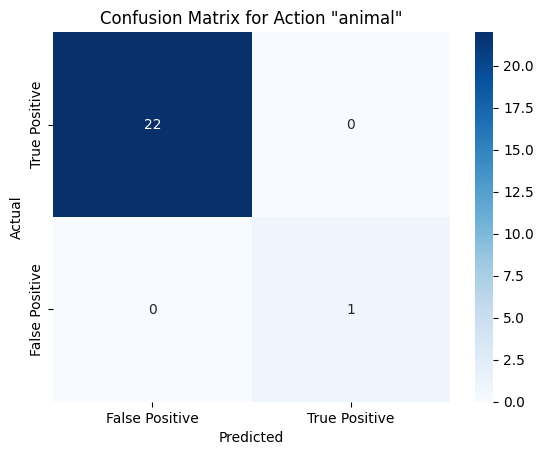

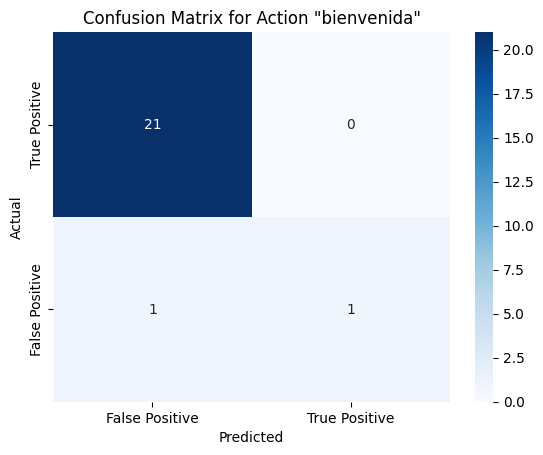

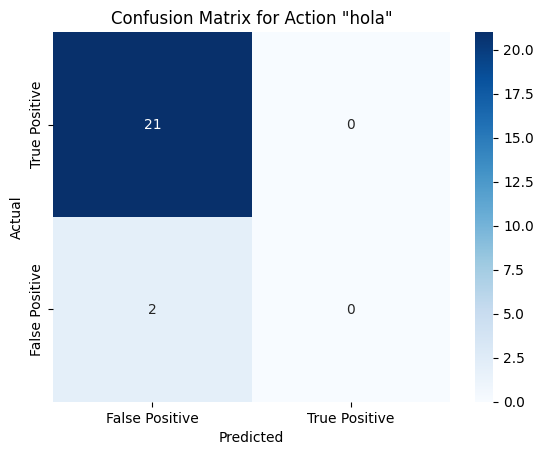

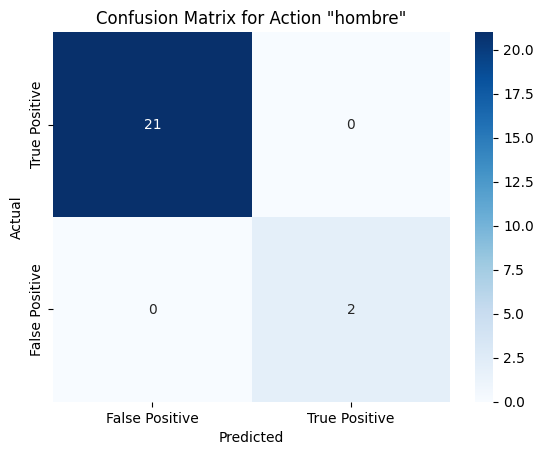

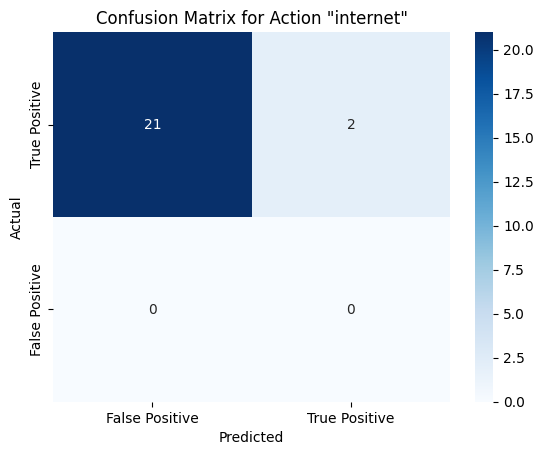

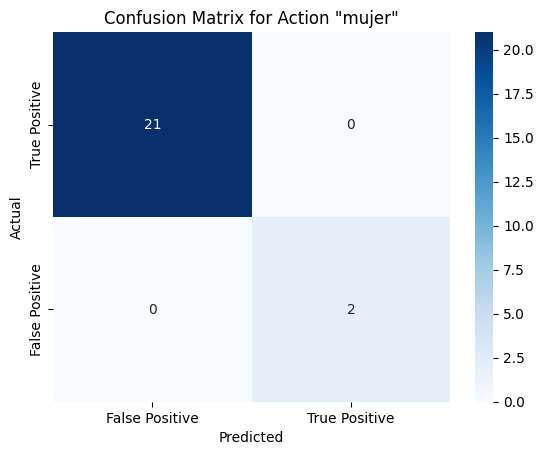

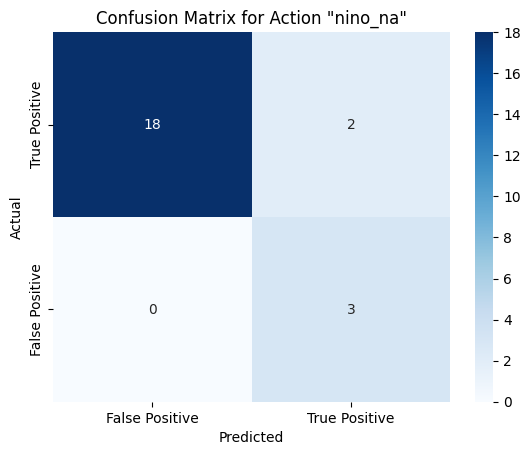

In [59]:
# Visualización usando Seaborn
plt.figure(figsize=(15, 10))
for i in range(len(confusion_matrix)):
    # Verificar si hay alguna predicción para esta acción
    if np.any(np.array([ytrue == i, ypred == i]).T):
        sns.heatmap(confusion_matrix[i], annot=True, fmt='.0f', cmap='Blues', 
                    xticklabels=['False Positive', 'True Positive'],
                    yticklabels=['True Positive', 'False Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Action "{actions[i]}"')
        plt.show()

In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1).tolist()
accuracy_score(ytrue, ypred)

1/1 [==============================] - 0s 57ms/step


0.782608695652174